In [1]:
import sys
sys.path.insert(0, r'../../quetzal/')
import syspy

import geopandas as gpd
ipath = r'inputs/'

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

## Zoning handling examples
- cleaning a zoning
TODO: create zoning with holes
- clustering
- renumbering
- snail renumbering
- coloring


<AxesSubplot:>

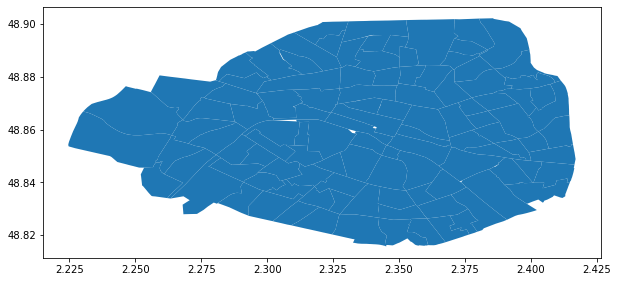

In [3]:
zones = gpd.read_file(ipath + r'zones_with_problems.geojson', driver='GeoJSON')
zones.plot()

<AxesSubplot:>

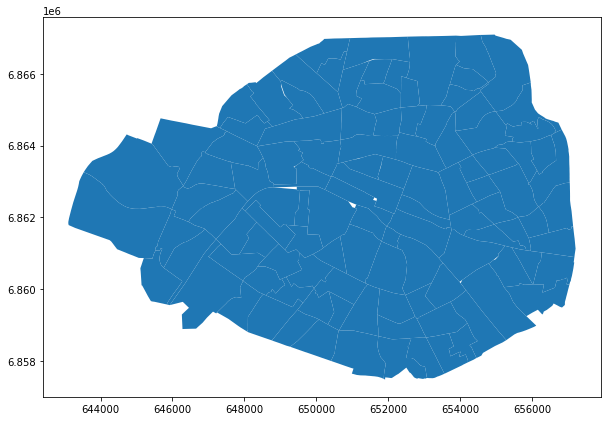

In [4]:
zones = zones.to_crs(epsg=2154)
zones.plot()

In [5]:
from syspy.spatial import polygons, zoning

SQLalchemy is not installed. No support for SQL output.


In [6]:
zones_clean = zones.copy()
zones_clean.geometry = polygons.clean_zoning(zones.geometry, coordinates='meter', buffer=1)

remove_overlaps: 100%|██████████| 110/110 [00:00<00:00, 112.45it/s]


<AxesSubplot:>

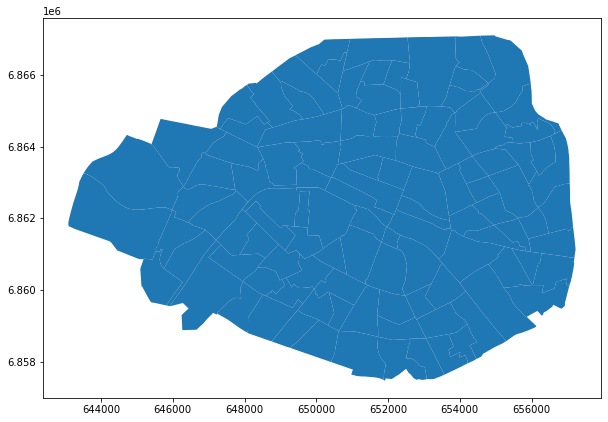

In [7]:
zones_clean.plot()

In [8]:
zones = zones_clean.copy()

# clustering

In [9]:
from syspy.spatial import spatial
spatial.zone_clusters??

Signature:
spatial.zone_clusters(
    zones,
    n_clusters=10,
    buffer=None,
    cluster_column=None,
    geo_union_method=<function union_geometry at 0x00000224D1492EE8>,
    geo_join_method=<function <lambda> at 0x00000224D149C798>,
)
Docstring: <no docstring>
Source:   
def zone_clusters(
    zones,
    n_clusters=10,
    buffer=None,
    cluster_column=None,
    geo_union_method=union_geometry,
    geo_join_method=lambda g: g.convex_hull
):
    n_clusters = min(n_clusters, len(zones))

    df = gpd.GeoDataFrame(add_centroid(zones))

    if buffer:
        df['geometry'] = df['geometry'].apply(lambda g: g.buffer(buffer))
    x = df[['longitude', 'latitude']].values

    if cluster_column:
        cluster_series = df['cluster'] = df[cluster_column]
    else:
        y_pred = KMeans(n_clusters=n_clusters, random_state=1).fit_predict(x)
        cluster_series = df['cluster'] = pd.Series(y_pred, index=df.index)

    cluster_series.name = 'cluster'

    geo = df.dissolve('cluster')['

In [10]:
cluster_geoms, cluster_ids = spatial.zone_clusters(zones, n_clusters=30)

<AxesSubplot:>

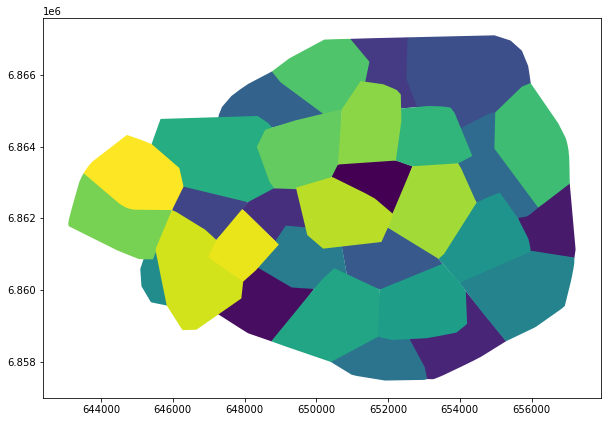

In [11]:
gpd.GeoDataFrame(cluster_geoms).reset_index().plot('cluster')

In [12]:
zones['cluster'] = cluster_ids

In [13]:
zones.head()

,index,area,emp,emp_dens,id,name,pop,pop_dens,geometry,cluster
0,zone_0,7.573637e+05,8362.052747,11041,1,1,264.319936,349,"POLYGON ((651666.014 6862476.297, 651676.580 6...",26
1,zone_1,1.057626e+06,55150.981545,52146,2,2,17338.725721,16394,"POLYGON ((650602.958 6863499.480, 650602.995 6...",0
2,zone_2,4.397285e+05,31273.053465,71119,3,3,4659.363525,10596,"POLYGON ((650764.028 6863522.533, 650760.505 6...",0
3,zone_3,5.628178e+05,31399.041132,55789,4,4,15915.361185,28278,"POLYGON ((652217.260 6863609.852, 652217.353 6...",0
4,zone_4,1.169330e+06,29889.237285,25561,5,5,34969.974971,29906,"POLYGON ((652435.676 6862794.218, 652435.753 6...",25


<AxesSubplot:>

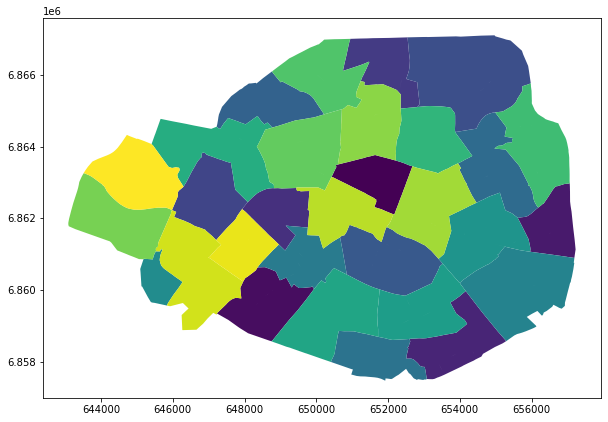

In [14]:
zones.dissolve('cluster').reset_index().plot('cluster')

# renumbering

In [15]:
from shapely.ops import cascaded_union

In [16]:
center = cascaded_union(zones.iloc[40:50].geometry.values).centroid
zones['new_id'] = zoning.snail_number(zones, center)

<AxesSubplot:>

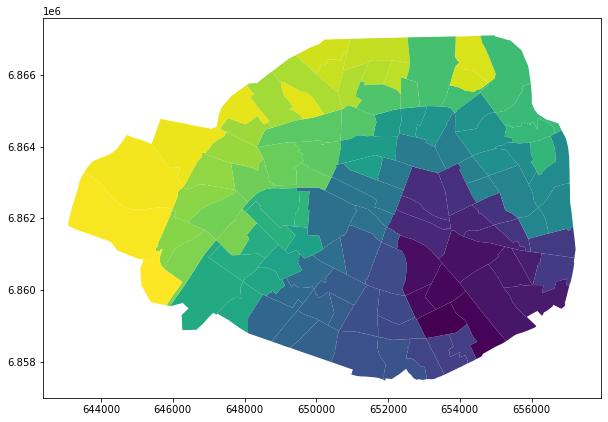

In [17]:
zones.plot('new_id')

<AxesSubplot:>

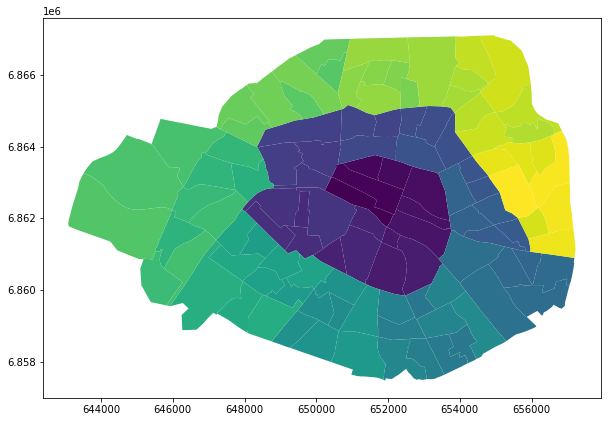

In [18]:
zones.plot('id')

In [19]:
zones['new_clustered_id'], zones['color_cluster'] = zoning.cluster_snail_number(zones, n_clusters=8)

<AxesSubplot:>

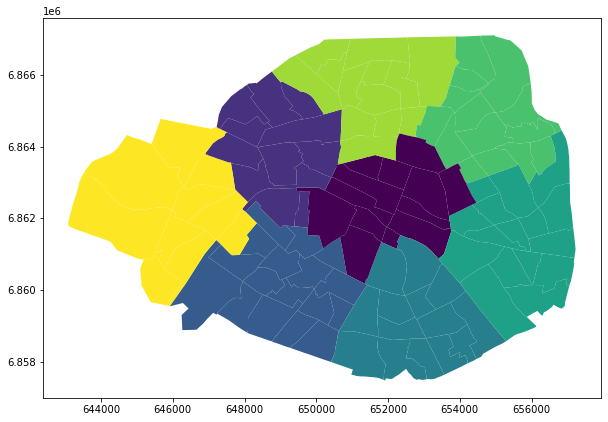

In [20]:
zones.plot('color_cluster')

<AxesSubplot:>

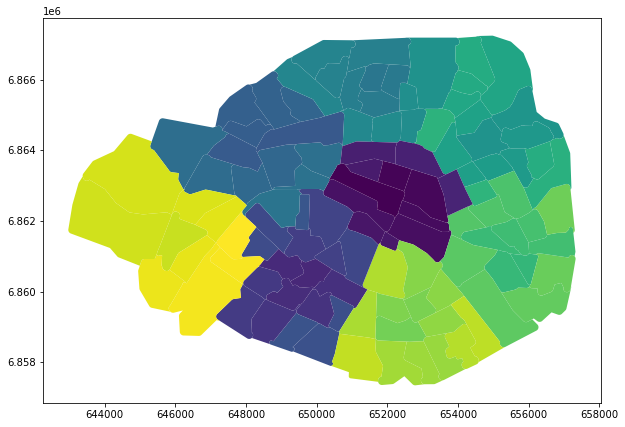

In [21]:
zones.plot('new_clustered_id')

## Coloring
Using official systra colors, or http://colorbrewer2.org/

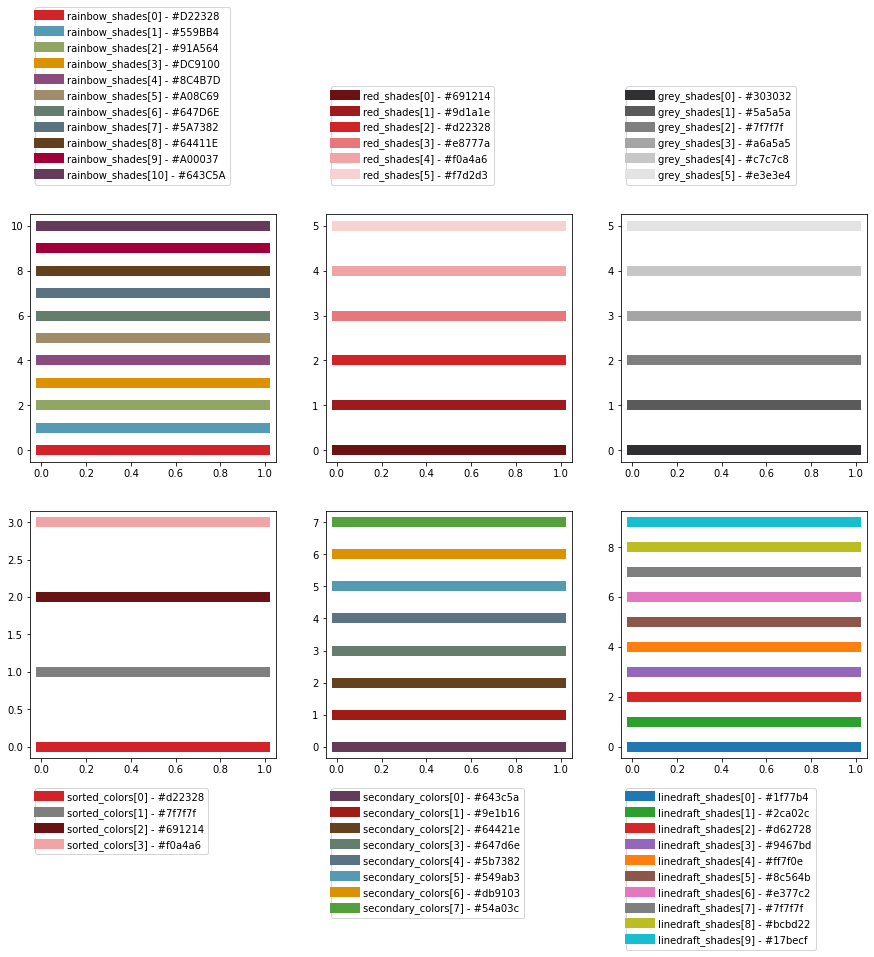

In [23]:
from syspy.syspy_utils import syscolors
syscolors.show_all_colors()

In [24]:
from syspy.spatial.zoning import greedy_color

zones['color'] = greedy_color(zones, colors=syscolors.linedraft_shades)

neighborhood_dataframe:   8%|▊         | 9/110 [00:00<00:01, 84.91it/s]

'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing c

neighborhood_dataframe:  23%|██▎       | 25/110 [00:00<00:01, 79.20it/s]

  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'lo

neighborhood_dataframe:  40%|████      | 44/110 [00:00<00:00, 84.15it/s]

  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'lo

neighborhood_dataframe:  58%|█████▊    | 64/110 [00:00<00:00, 89.80it/s]

  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'lo

neighborhood_dataframe:  68%|██████▊   | 75/110 [00:00<00:00, 94.11it/s]

'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing c

neighborhood_dataframe:  88%|████████▊ | 97/110 [00:01<00:00, 96.70it/s]

'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing c

neighborhood_dataframe: 100%|██████████| 110/110 [00:01<00:00, 91.38it/s]

'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing c

<AxesSubplot:>

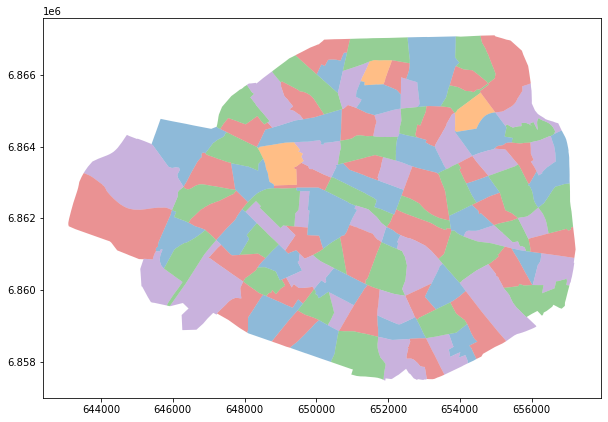

In [25]:
zones.plot(color=zones['color'], alpha=0.5)